In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_10degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape(((36*3+1)*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape(((36*3+1)*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(457, 100, 100)


In [17]:
print(y_test.shape)

(197, 100, 100)


In [18]:
print(x_train.shape)

(457, 15, 1)


In [19]:
print(x_test.shape)

(197, 15, 1)


In [20]:
theta_train.shape

(457,)

In [21]:
tsr_train.shape

(457,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((457, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((197, 2, 1))

In [28]:
tsr_theta_train.shape

(457, 2, 1)

In [29]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
12/12 [==============================] - 1s 6ms/step - loss: 0.0108 - rmse: 0.1034
Epoch 2/10000
12/12 [==============================] - 0s 7ms/step - loss: 0.0103 - rmse: 0.1005
Epoch 3/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0090 - rmse: 0.0938
Epoch 4/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0869
Epoch 5/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0843
Epoch 6/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 7/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0838
Epoch 8/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 9/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 10/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 11/10000
12/12 [=======

12/12 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 85/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 86/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 87/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 88/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 89/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 90/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0798
Epoch 91/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0797
Epoch 92/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0796
Epoch 93/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0796
Epoch 94/10000
12/12 [=============

12/12 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0762
Epoch 168/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0762
Epoch 169/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0761
Epoch 170/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0761
Epoch 171/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0761
Epoch 172/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0759
Epoch 173/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 174/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0759
Epoch 175/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 176/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0757
Epoch 177/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0694
Epoch 250/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0691
Epoch 251/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0691
Epoch 252/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0690
Epoch 253/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0689
Epoch 254/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 255/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 256/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 257/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0684
Epoch 258/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0684
Epoch 259/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0632
Epoch 332/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0632
Epoch 333/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0631
Epoch 334/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0631
Epoch 335/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0629
Epoch 336/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0629
Epoch 337/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 338/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 339/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 340/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 341/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0589
Epoch 414/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0588
Epoch 415/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0588
Epoch 416/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0587
Epoch 417/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0588
Epoch 418/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 419/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 420/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 421/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 422/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 423/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 496/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 497/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 498/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0557
Epoch 499/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 500/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0555
Epoch 501/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0555
Epoch 502/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0555
Epoch 503/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0554
Epoch 504/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0554
Epoch 505/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 578/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 579/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0530
Epoch 580/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 581/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 582/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 583/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 584/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0526
Epoch 585/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 586/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0526
Epoch 587/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 660/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0502
Epoch 661/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 662/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0502
Epoch 663/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0501
Epoch 664/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0502
Epoch 665/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0502
Epoch 666/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0502
Epoch 667/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0501
Epoch 668/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0499
Epoch 669/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0478
Epoch 742/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0475
Epoch 743/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0475
Epoch 744/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0475
Epoch 745/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0474
Epoch 746/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0476
Epoch 747/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0475
Epoch 748/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 749/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 750/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 751/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0455
Epoch 824/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0455
Epoch 825/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0455
Epoch 826/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0455
Epoch 827/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0453
Epoch 828/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0453
Epoch 829/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0452
Epoch 830/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0453
Epoch 831/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0453
Epoch 832/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0453
Epoch 833/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0436
Epoch 906/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0436
Epoch 907/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 908/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 909/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 910/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 911/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0434
Epoch 912/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0433
Epoch 913/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0432
Epoch 914/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0432
Epoch 915/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 988/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 989/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 990/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 991/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 992/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 993/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 994/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 995/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 996/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 997/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0397
Epoch 1070/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0398
Epoch 1071/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 1072/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 1073/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 1074/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 1075/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 1076/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0397
Epoch 1077/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0397
Epoch 1078/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0397
Epoch 1079/10000


12/12 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0383
Epoch 1152/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0382
Epoch 1153/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0382
Epoch 1154/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0382
Epoch 1155/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0382
Epoch 1156/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0381
Epoch 1157/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0381
Epoch 1158/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0381
Epoch 1159/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0383
Epoch 1160/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0384
Epoch 1161/10000


12/12 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0369
Epoch 1234/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0370
Epoch 1235/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0371
Epoch 1236/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0370
Epoch 1237/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0371
Epoch 1238/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0369
Epoch 1239/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0370
Epoch 1240/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0368
Epoch 1241/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0368
Epoch 1242/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0367
Epoch 1243/10000


12/12 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0354
Epoch 1316/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0357
Epoch 1317/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0354
Epoch 1318/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0356
Epoch 1319/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0355
Epoch 1320/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0356
Epoch 1321/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0358
Epoch 1322/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0355
Epoch 1323/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0353
Epoch 1324/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0351
Epoch 1325/10000


12/12 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 1398/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 1399/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 1400/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 1401/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 1402/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0341
Epoch 1403/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0342
Epoch 1404/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 1405/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0342
Epoch 1406/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0340
Epoch 1407/10000


12/12 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0331
Epoch 1480/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 1481/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0328
Epoch 1482/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 1483/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 1484/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0327
Epoch 1485/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 1486/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 1487/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 1488/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0328
Epoch 1489/10000


12/12 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0325
Epoch 1562/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0323
Epoch 1563/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0323
Epoch 1564/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0322
Epoch 1565/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0322
Epoch 1566/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 1567/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0322
Epoch 1568/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 1569/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 1570/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 1571/10000


12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 1643/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0311
Epoch 1644/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0308
Epoch 1645/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0307
Epoch 1646/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0309
Epoch 1647/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 1648/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 1649/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 1650/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0309
Epoch 1651/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 1652/10000


12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0303
Epoch 1725/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 1726/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0302
Epoch 1727/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0298
Epoch 1728/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0299
Epoch 1729/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0298
Epoch 1730/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0299
Epoch 1731/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0302
Epoch 1732/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0302
Epoch 1733/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0298
Epoch 1734/10000


12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0296
Epoch 1805/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.8939e-04 - rmse: 0.0294
Epoch 1806/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0298
Epoch 1807/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0298
Epoch 1808/10000
12/12 [==============================] - 0s 6ms/step - loss: 9.9250e-04 - rmse: 0.0295
Epoch 1809/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.6902e-04 - rmse: 0.0291
Epoch 1810/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.6496e-04 - rmse: 0.0290
Epoch 1811/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.8809e-04 - rmse: 0.0294
Epoch 1812/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7254e-04 - rmse: 0.0291
Epoch 1813/10000
12/12 [==============================] - 0s 6ms/step - loss: 9.5613e-04 - rm

12/12 [==============================] - 0s 5ms/step - loss: 9.2908e-04 - rmse: 0.0284
Epoch 1884/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.3569e-04 - rmse: 0.0285
Epoch 1885/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.2509e-04 - rmse: 0.0283
Epoch 1886/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.5291e-04 - rmse: 0.0288
Epoch 1887/10000
12/12 [==============================] - 0s 6ms/step - loss: 9.4429e-04 - rmse: 0.0286
Epoch 1888/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.4122e-04 - rmse: 0.0286
Epoch 1889/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.4132e-04 - rmse: 0.0286
Epoch 1890/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.3189e-04 - rmse: 0.0284
Epoch 1891/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.3729e-04 - rmse: 0.0285
Epoch 1892/10000
12/12 [==============================] - 0s 6ms/step - loss: 9.1

12/12 [==============================] - 0s 6ms/step - loss: 9.0332e-04 - rmse: 0.0279
Epoch 1962/10000
12/12 [==============================] - 0s 6ms/step - loss: 8.9017e-04 - rmse: 0.0277
Epoch 1963/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.0263e-04 - rmse: 0.0279
Epoch 1964/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.1093e-04 - rmse: 0.0280
Epoch 1965/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.0078e-04 - rmse: 0.0279
Epoch 1966/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.8343e-04 - rmse: 0.0275
Epoch 1967/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9871e-04 - rmse: 0.0278
Epoch 1968/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9001e-04 - rmse: 0.0277
Epoch 1969/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.8319e-04 - rmse: 0.0275
Epoch 1970/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9

12/12 [==============================] - 0s 5ms/step - loss: 8.6023e-04 - rmse: 0.0271
Epoch 2040/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.4544e-04 - rmse: 0.0268
Epoch 2041/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.6700e-04 - rmse: 0.0272
Epoch 2042/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7048e-04 - rmse: 0.0273
Epoch 2043/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.4654e-04 - rmse: 0.0269
Epoch 2044/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3376e-04 - rmse: 0.0266
Epoch 2045/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.2850e-04 - rmse: 0.0265
Epoch 2046/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3918e-04 - rmse: 0.0267
Epoch 2047/10000
12/12 [==============================] - 0s 6ms/step - loss: 8.5186e-04 - rmse: 0.0270
Epoch 2048/10000
12/12 [==============================] - 0s 6ms/step - loss: 8.5

12/12 [==============================] - 0s 5ms/step - loss: 8.0538e-04 - rmse: 0.0261
Epoch 2118/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.0530e-04 - rmse: 0.0261
Epoch 2119/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.0117e-04 - rmse: 0.0260
Epoch 2120/10000
12/12 [==============================] - 0s 6ms/step - loss: 8.2790e-04 - rmse: 0.0265
Epoch 2121/10000
12/12 [==============================] - 0s 6ms/step - loss: 8.1519e-04 - rmse: 0.0263
Epoch 2122/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1487e-04 - rmse: 0.0263
Epoch 2123/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.2333e-04 - rmse: 0.0264
Epoch 2124/10000
12/12 [==============================] - 0s 6ms/step - loss: 8.2965e-04 - rmse: 0.0265
Epoch 2125/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.4320e-04 - rmse: 0.0268
Epoch 2126/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3

12/12 [==============================] - 0s 5ms/step - loss: 8.0293e-04 - rmse: 0.0260
Epoch 2196/10000
12/12 [==============================] - 0s 6ms/step - loss: 7.8559e-04 - rmse: 0.0257
Epoch 2197/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7641e-04 - rmse: 0.0255
Epoch 2198/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.9488e-04 - rmse: 0.0259
Epoch 2199/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8408e-04 - rmse: 0.0257
Epoch 2200/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.9281e-04 - rmse: 0.0258
Epoch 2201/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7607e-04 - rmse: 0.0255
Epoch 2202/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8709e-04 - rmse: 0.0257
Epoch 2203/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8072e-04 - rmse: 0.0256
Epoch 2204/10000
12/12 [==============================] - 0s 6ms/step - loss: 7.9

12/12 [==============================] - 0s 5ms/step - loss: 7.6093e-04 - rmse: 0.0252
Epoch 2274/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4414e-04 - rmse: 0.0249
Epoch 2275/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5862e-04 - rmse: 0.0251
Epoch 2276/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7173e-04 - rmse: 0.0254
Epoch 2277/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7541e-04 - rmse: 0.0255
Epoch 2278/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.9259e-04 - rmse: 0.0258
Epoch 2279/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.0254e-04 - rmse: 0.0260
Epoch 2280/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.6745e-04 - rmse: 0.0253
Epoch 2281/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.6376e-04 - rmse: 0.0252
Epoch 2282/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4

12/12 [==============================] - 0s 5ms/step - loss: 7.0870e-04 - rmse: 0.0241
Epoch 2352/10000
12/12 [==============================] - 0s 6ms/step - loss: 7.1550e-04 - rmse: 0.0243
Epoch 2353/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1429e-04 - rmse: 0.0242
Epoch 2354/10000
12/12 [==============================] - 0s 6ms/step - loss: 7.1021e-04 - rmse: 0.0242
Epoch 2355/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4449e-04 - rmse: 0.0249
Epoch 2356/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.3387e-04 - rmse: 0.0246
Epoch 2357/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2637e-04 - rmse: 0.0245
Epoch 2358/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1469e-04 - rmse: 0.0242
Epoch 2359/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1299e-04 - rmse: 0.0242
Epoch 2360/10000
12/12 [==============================] - 0s 6ms/step - loss: 7.2

12/12 [==============================] - 0s 5ms/step - loss: 6.8585e-04 - rmse: 0.0236
Epoch 2430/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7697e-04 - rmse: 0.0235
Epoch 2431/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7351e-04 - rmse: 0.0234
Epoch 2432/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8433e-04 - rmse: 0.0236
Epoch 2433/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9277e-04 - rmse: 0.0238
Epoch 2434/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9288e-04 - rmse: 0.0238
Epoch 2435/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9219e-04 - rmse: 0.0238
Epoch 2436/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7430e-04 - rmse: 0.0234
Epoch 2437/10000
12/12 [==============================] - 0s 6ms/step - loss: 6.8421e-04 - rmse: 0.0236
Epoch 2438/10000
12/12 [==============================] - 0s 6ms/step - loss: 6.8

12/12 [==============================] - 0s 5ms/step - loss: 6.6220e-04 - rmse: 0.0231
Epoch 2508/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5780e-04 - rmse: 0.0230
Epoch 2509/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5383e-04 - rmse: 0.0229
Epoch 2510/10000
12/12 [==============================] - 0s 6ms/step - loss: 6.5872e-04 - rmse: 0.0231
Epoch 2511/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6911e-04 - rmse: 0.0233
Epoch 2512/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6130e-04 - rmse: 0.0231
Epoch 2513/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6291e-04 - rmse: 0.0231
Epoch 2514/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7782e-04 - rmse: 0.0235
Epoch 2515/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7344e-04 - rmse: 0.0234
Epoch 2516/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5

12/12 [==============================] - 0s 5ms/step - loss: 6.5060e-04 - rmse: 0.0229
Epoch 2586/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4099e-04 - rmse: 0.0227
Epoch 2587/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5946e-04 - rmse: 0.0231
Epoch 2588/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5816e-04 - rmse: 0.0230
Epoch 2589/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4926e-04 - rmse: 0.0228
Epoch 2590/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3521e-04 - rmse: 0.0225
Epoch 2591/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2345e-04 - rmse: 0.0223
Epoch 2592/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3455e-04 - rmse: 0.0225
Epoch 2593/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2808e-04 - rmse: 0.0224
Epoch 2594/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4

12/12 [==============================] - 0s 5ms/step - loss: 6.0519e-04 - rmse: 0.0219
Epoch 2664/10000
12/12 [==============================] - 0s 6ms/step - loss: 6.0681e-04 - rmse: 0.0219
Epoch 2665/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1379e-04 - rmse: 0.0221
Epoch 2666/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0562e-04 - rmse: 0.0219
Epoch 2667/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2469e-04 - rmse: 0.0223
Epoch 2668/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1628e-04 - rmse: 0.0221
Epoch 2669/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5681e-04 - rmse: 0.0230
Epoch 2670/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5346e-04 - rmse: 0.0229
Epoch 2671/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2729e-04 - rmse: 0.0224
Epoch 2672/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1

12/12 [==============================] - 0s 6ms/step - loss: 5.9424e-04 - rmse: 0.0216
Epoch 2742/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0672e-04 - rmse: 0.0219
Epoch 2743/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9051e-04 - rmse: 0.0215
Epoch 2744/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9041e-04 - rmse: 0.0215
Epoch 2745/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9805e-04 - rmse: 0.0217
Epoch 2746/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0072e-04 - rmse: 0.0218
Epoch 2747/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9932e-04 - rmse: 0.0217
Epoch 2748/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9998e-04 - rmse: 0.0217
Epoch 2749/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1589e-04 - rmse: 0.0221
Epoch 2750/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0

12/12 [==============================] - 0s 5ms/step - loss: 5.6489e-04 - rmse: 0.0209
Epoch 2820/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6754e-04 - rmse: 0.0210
Epoch 2821/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.9179e-04 - rmse: 0.0215
Epoch 2822/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8523e-04 - rmse: 0.0214
Epoch 2823/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.7057e-04 - rmse: 0.0210
Epoch 2824/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.7623e-04 - rmse: 0.0212
Epoch 2825/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7021e-04 - rmse: 0.0210
Epoch 2826/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6589e-04 - rmse: 0.0209
Epoch 2827/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.6768e-04 - rmse: 0.0210
Epoch 2828/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.7

12/12 [==============================] - 0s 6ms/step - loss: 5.6597e-04 - rmse: 0.0209
Epoch 2898/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.5217e-04 - rmse: 0.0206
Epoch 2899/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.6218e-04 - rmse: 0.0208
Epoch 2900/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.5613e-04 - rmse: 0.0207
Epoch 2901/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.4803e-04 - rmse: 0.0205
Epoch 2902/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.5416e-04 - rmse: 0.0207
Epoch 2903/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4852e-04 - rmse: 0.0205
Epoch 2904/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.4221e-04 - rmse: 0.0204
Epoch 2905/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4716e-04 - rmse: 0.0205
Epoch 2906/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4

12/12 [==============================] - 0s 6ms/step - loss: 5.2521e-04 - rmse: 0.0199
Epoch 2976/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2132e-04 - rmse: 0.0198
Epoch 2977/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3674e-04 - rmse: 0.0202
Epoch 2978/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2671e-04 - rmse: 0.0200
Epoch 2979/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2995e-04 - rmse: 0.0201
Epoch 2980/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3562e-04 - rmse: 0.0202
Epoch 2981/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4586e-04 - rmse: 0.0205
Epoch 2982/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3636e-04 - rmse: 0.0202
Epoch 2983/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.3597e-04 - rmse: 0.0202
Epoch 2984/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3

12/12 [==============================] - 0s 5ms/step - loss: 5.4345e-04 - rmse: 0.0204
Epoch 3054/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3189e-04 - rmse: 0.0201
Epoch 3055/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.1547e-04 - rmse: 0.0197
Epoch 3056/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0918e-04 - rmse: 0.0195
Epoch 3057/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.0320e-04 - rmse: 0.0194
Epoch 3058/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.0439e-04 - rmse: 0.0194
Epoch 3059/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1012e-04 - rmse: 0.0196
Epoch 3060/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2482e-04 - rmse: 0.0199
Epoch 3061/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2470e-04 - rmse: 0.0199
Epoch 3062/10000
12/12 [==============================] - 0s 6ms/step - loss: 5.4

12/12 [==============================] - 0s 5ms/step - loss: 5.0161e-04 - rmse: 0.0193
Epoch 3132/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2408e-04 - rmse: 0.0199
Epoch 3133/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2397e-04 - rmse: 0.0199
Epoch 3134/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4285e-04 - rmse: 0.0204
Epoch 3135/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2414e-04 - rmse: 0.0199
Epoch 3136/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1646e-04 - rmse: 0.0197
Epoch 3137/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9854e-04 - rmse: 0.0193
Epoch 3138/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3361e-04 - rmse: 0.0202
Epoch 3139/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0211e-04 - rmse: 0.0194
Epoch 3140/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0

12/12 [==============================] - 0s 5ms/step - loss: 4.7529e-04 - rmse: 0.0187
Epoch 3210/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.7819e-04 - rmse: 0.0187
Epoch 3211/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7858e-04 - rmse: 0.0187
Epoch 3212/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7066e-04 - rmse: 0.0185
Epoch 3213/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8232e-04 - rmse: 0.0188
Epoch 3214/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9848e-04 - rmse: 0.0193
Epoch 3215/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1750e-04 - rmse: 0.0198
Epoch 3216/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9190e-04 - rmse: 0.0191
Epoch 3217/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8941e-04 - rmse: 0.0190
Epoch 3218/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0

12/12 [==============================] - 0s 6ms/step - loss: 4.6929e-04 - rmse: 0.0185
Epoch 3288/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5985e-04 - rmse: 0.0182
Epoch 3289/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6487e-04 - rmse: 0.0184
Epoch 3290/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6980e-04 - rmse: 0.0185
Epoch 3291/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.6466e-04 - rmse: 0.0184
Epoch 3292/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.6323e-04 - rmse: 0.0183
Epoch 3293/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7309e-04 - rmse: 0.0186
Epoch 3294/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6533e-04 - rmse: 0.0184
Epoch 3295/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8934e-04 - rmse: 0.0190
Epoch 3296/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7

12/12 [==============================] - 0s 5ms/step - loss: 4.5240e-04 - rmse: 0.0180
Epoch 3366/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5351e-04 - rmse: 0.0181
Epoch 3367/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5748e-04 - rmse: 0.0182
Epoch 3368/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6052e-04 - rmse: 0.0183
Epoch 3369/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5951e-04 - rmse: 0.0182
Epoch 3370/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.6367e-04 - rmse: 0.0183
Epoch 3371/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5731e-04 - rmse: 0.0182
Epoch 3372/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5956e-04 - rmse: 0.0182
Epoch 3373/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6059e-04 - rmse: 0.0183
Epoch 3374/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5

12/12 [==============================] - 0s 6ms/step - loss: 4.8872e-04 - rmse: 0.0190
Epoch 3444/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6017e-04 - rmse: 0.0183
Epoch 3445/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5393e-04 - rmse: 0.0181
Epoch 3446/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.5091e-04 - rmse: 0.0180
Epoch 3447/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5500e-04 - rmse: 0.0181
Epoch 3448/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5544e-04 - rmse: 0.0181
Epoch 3449/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.4980e-04 - rmse: 0.0180
Epoch 3450/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.4667e-04 - rmse: 0.0179
Epoch 3451/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3720e-04 - rmse: 0.0176
Epoch 3452/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.5

12/12 [==============================] - 0s 5ms/step - loss: 4.3503e-04 - rmse: 0.0176
Epoch 3522/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4088e-04 - rmse: 0.0177
Epoch 3523/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3978e-04 - rmse: 0.0177
Epoch 3524/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4060e-04 - rmse: 0.0177
Epoch 3525/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.3544e-04 - rmse: 0.0176
Epoch 3526/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2625e-04 - rmse: 0.0173
Epoch 3527/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2963e-04 - rmse: 0.0174
Epoch 3528/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1891e-04 - rmse: 0.0171
Epoch 3529/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1412e-04 - rmse: 0.0170
Epoch 3530/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 4.2315e-04 - rmse: 0.0172
Epoch 3600/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1690e-04 - rmse: 0.0170
Epoch 3601/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.2695e-04 - rmse: 0.0173
Epoch 3602/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.4145e-04 - rmse: 0.0178
Epoch 3603/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.4832e-04 - rmse: 0.0179
Epoch 3604/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.4382e-04 - rmse: 0.0178
Epoch 3605/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.3134e-04 - rmse: 0.0175
Epoch 3606/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2369e-04 - rmse: 0.0172
Epoch 3607/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1569e-04 - rmse: 0.0170
Epoch 3608/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 6ms/step - loss: 4.1135e-04 - rmse: 0.0169
Epoch 3678/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.2956e-04 - rmse: 0.0174
Epoch 3679/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2546e-04 - rmse: 0.0173
Epoch 3680/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3924e-04 - rmse: 0.0177
Epoch 3681/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.2230e-04 - rmse: 0.0172
Epoch 3682/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1343e-04 - rmse: 0.0169
Epoch 3683/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1078e-04 - rmse: 0.0169
Epoch 3684/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0893e-04 - rmse: 0.0168
Epoch 3685/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1843e-04 - rmse: 0.0171
Epoch 3686/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.2

12/12 [==============================] - 0s 6ms/step - loss: 3.9513e-04 - rmse: 0.0164
Epoch 3756/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0514e-04 - rmse: 0.0167
Epoch 3757/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1782e-04 - rmse: 0.0171
Epoch 3758/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.2197e-04 - rmse: 0.0172
Epoch 3759/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.4121e-04 - rmse: 0.0178
Epoch 3760/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1626e-04 - rmse: 0.0170
Epoch 3761/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0139e-04 - rmse: 0.0166
Epoch 3762/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0340e-04 - rmse: 0.0167
Epoch 3763/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0010e-04 - rmse: 0.0166
Epoch 3764/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.9

12/12 [==============================] - 0s 6ms/step - loss: 4.1474e-04 - rmse: 0.0170
Epoch 3834/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.3054e-04 - rmse: 0.0175
Epoch 3835/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.3262e-04 - rmse: 0.0175
Epoch 3836/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1766e-04 - rmse: 0.0171
Epoch 3837/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1105e-04 - rmse: 0.0169
Epoch 3838/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1080e-04 - rmse: 0.0169
Epoch 3839/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1818e-04 - rmse: 0.0171
Epoch 3840/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0060e-04 - rmse: 0.0166
Epoch 3841/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.9411e-04 - rmse: 0.0164
Epoch 3842/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9

12/12 [==============================] - 0s 5ms/step - loss: 3.8411e-04 - rmse: 0.0161
Epoch 3912/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.7710e-04 - rmse: 0.0159
Epoch 3913/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.8306e-04 - rmse: 0.0161
Epoch 3914/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.8611e-04 - rmse: 0.0161
Epoch 3915/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.7977e-04 - rmse: 0.0160
Epoch 3916/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.7236e-04 - rmse: 0.0157
Epoch 3917/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.6970e-04 - rmse: 0.0156
Epoch 3918/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.7556e-04 - rmse: 0.0158
Epoch 3919/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8251e-04 - rmse: 0.0160
Epoch 3920/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.8

12/12 [==============================] - 0s 5ms/step - loss: 3.8214e-04 - rmse: 0.0160
Epoch 3990/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.9016e-04 - rmse: 0.0163
Epoch 3991/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0024e-04 - rmse: 0.0166
Epoch 3992/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.9989e-04 - rmse: 0.0166
Epoch 3993/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8507e-04 - rmse: 0.0161
Epoch 3994/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.7510e-04 - rmse: 0.0158
Epoch 3995/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.6995e-04 - rmse: 0.0157
Epoch 3996/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.6437e-04 - rmse: 0.0155
Epoch 3997/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.7566e-04 - rmse: 0.0158
Epoch 3998/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.6

12/12 [==============================] - 0s 5ms/step - loss: 3.6152e-04 - rmse: 0.0154
Epoch 4068/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.7676e-04 - rmse: 0.0159
Epoch 4069/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8191e-04 - rmse: 0.0160
Epoch 4070/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8415e-04 - rmse: 0.0161
Epoch 4071/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.7892e-04 - rmse: 0.0159
Epoch 4072/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.7384e-04 - rmse: 0.0158
Epoch 4073/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.7099e-04 - rmse: 0.0157
Epoch 4074/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.6486e-04 - rmse: 0.0155
Epoch 4075/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.5622e-04 - rmse: 0.0152
Epoch 4076/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.5

12/12 [==============================] - 0s 5ms/step - loss: 3.7088e-04 - rmse: 0.0157
Epoch 4146/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.7711e-04 - rmse: 0.0159
Epoch 4147/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.7940e-04 - rmse: 0.0160
Epoch 4148/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.6662e-04 - rmse: 0.0156
Epoch 4149/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.5424e-04 - rmse: 0.0152
Epoch 4150/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.5358e-04 - rmse: 0.0151
Epoch 4151/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.4461e-04 - rmse: 0.0148
Epoch 4152/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.3851e-04 - rmse: 0.0146
Epoch 4153/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.4946e-04 - rmse: 0.0150
Epoch 4154/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.5

12/12 [==============================] - 0s 6ms/step - loss: 3.5411e-04 - rmse: 0.0152
Epoch 4224/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.5207e-04 - rmse: 0.0151
Epoch 4225/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.4750e-04 - rmse: 0.0149
Epoch 4226/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.5857e-04 - rmse: 0.0153
Epoch 4227/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.5747e-04 - rmse: 0.0153
Epoch 4228/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.6246e-04 - rmse: 0.0154
Epoch 4229/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.4811e-04 - rmse: 0.0150
Epoch 4230/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3958e-04 - rmse: 0.0147
Epoch 4231/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.4063e-04 - rmse: 0.0147
Epoch 4232/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.5

12/12 [==============================] - 0s 5ms/step - loss: 3.7724e-04 - rmse: 0.0159
Epoch 4302/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.5353e-04 - rmse: 0.0152
Epoch 4303/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.4142e-04 - rmse: 0.0148
Epoch 4304/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3939e-04 - rmse: 0.0147
Epoch 4305/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.4140e-04 - rmse: 0.0148
Epoch 4306/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.3186e-04 - rmse: 0.0144
Epoch 4307/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2933e-04 - rmse: 0.0143
Epoch 4308/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3432e-04 - rmse: 0.0145
Epoch 4309/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3165e-04 - rmse: 0.0144
Epoch 4310/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2

12/12 [==============================] - 0s 5ms/step - loss: 3.4444e-04 - rmse: 0.0149
Epoch 4380/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.5515e-04 - rmse: 0.0152
Epoch 4381/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3966e-04 - rmse: 0.0147
Epoch 4382/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3044e-04 - rmse: 0.0144
Epoch 4383/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.4064e-04 - rmse: 0.0147
Epoch 4384/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3347e-04 - rmse: 0.0145
Epoch 4385/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2734e-04 - rmse: 0.0143
Epoch 4386/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2114e-04 - rmse: 0.0141
Epoch 4387/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.2866e-04 - rmse: 0.0143
Epoch 4388/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2

12/12 [==============================] - 0s 5ms/step - loss: 3.1592e-04 - rmse: 0.0139
Epoch 4458/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.1876e-04 - rmse: 0.0140
Epoch 4459/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.1454e-04 - rmse: 0.0138
Epoch 4460/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2135e-04 - rmse: 0.0141
Epoch 4461/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3776e-04 - rmse: 0.0147
Epoch 4462/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.4041e-04 - rmse: 0.0147
Epoch 4463/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.4156e-04 - rmse: 0.0148
Epoch 4464/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.4011e-04 - rmse: 0.0147
Epoch 4465/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.5635e-04 - rmse: 0.0153
Epoch 4466/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.6

12/12 [==============================] - 0s 6ms/step - loss: 3.0545e-04 - rmse: 0.0135
Epoch 4536/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0602e-04 - rmse: 0.0135
Epoch 4537/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2248e-04 - rmse: 0.0141
Epoch 4538/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2134e-04 - rmse: 0.0141
Epoch 4539/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2186e-04 - rmse: 0.0141
Epoch 4540/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2375e-04 - rmse: 0.0142
Epoch 4541/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.1569e-04 - rmse: 0.0139
Epoch 4542/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.1520e-04 - rmse: 0.0139
Epoch 4543/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2252e-04 - rmse: 0.0141
Epoch 4544/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.1

12/12 [==============================] - 0s 5ms/step - loss: 3.0824e-04 - rmse: 0.0136
Epoch 4614/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.1985e-04 - rmse: 0.0141
Epoch 4615/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.1236e-04 - rmse: 0.0138
Epoch 4616/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0652e-04 - rmse: 0.0136
Epoch 4617/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.1590e-04 - rmse: 0.0139
Epoch 4618/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.1845e-04 - rmse: 0.0140
Epoch 4619/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2486e-04 - rmse: 0.0142
Epoch 4620/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.1363e-04 - rmse: 0.0138
Epoch 4621/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.0856e-04 - rmse: 0.0137
Epoch 4622/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0

12/12 [==============================] - 0s 6ms/step - loss: 3.1147e-04 - rmse: 0.0138
Epoch 4692/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.1006e-04 - rmse: 0.0137
Epoch 4693/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.0699e-04 - rmse: 0.0136
Epoch 4694/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.9950e-04 - rmse: 0.0133
Epoch 4695/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0255e-04 - rmse: 0.0134
Epoch 4696/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0183e-04 - rmse: 0.0134
Epoch 4697/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0631e-04 - rmse: 0.0136
Epoch 4698/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.0659e-04 - rmse: 0.0136
Epoch 4699/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0133e-04 - rmse: 0.0134
Epoch 4700/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0

12/12 [==============================] - 0s 5ms/step - loss: 3.0767e-04 - rmse: 0.0137
Epoch 4770/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.1301e-04 - rmse: 0.0138
Epoch 4771/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0897e-04 - rmse: 0.0137
Epoch 4772/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0411e-04 - rmse: 0.0135
Epoch 4773/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0331e-04 - rmse: 0.0135
Epoch 4774/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9688e-04 - rmse: 0.0133
Epoch 4775/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9815e-04 - rmse: 0.0133
Epoch 4776/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.0233e-04 - rmse: 0.0135
Epoch 4777/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.0350e-04 - rmse: 0.0135
Epoch 4778/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0

12/12 [==============================] - 0s 6ms/step - loss: 3.0272e-04 - rmse: 0.0135
Epoch 4848/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0874e-04 - rmse: 0.0137
Epoch 4849/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0512e-04 - rmse: 0.0136
Epoch 4850/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9850e-04 - rmse: 0.0133
Epoch 4851/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0410e-04 - rmse: 0.0135
Epoch 4852/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9563e-04 - rmse: 0.0132
Epoch 4853/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9365e-04 - rmse: 0.0131
Epoch 4854/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9733e-04 - rmse: 0.0133
Epoch 4855/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.0064e-04 - rmse: 0.0134
Epoch 4856/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.9

12/12 [==============================] - 0s 5ms/step - loss: 3.0464e-04 - rmse: 0.0136
Epoch 4926/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0269e-04 - rmse: 0.0135
Epoch 4927/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9894e-04 - rmse: 0.0134
Epoch 4928/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0338e-04 - rmse: 0.0135
Epoch 4929/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9184e-04 - rmse: 0.0131
Epoch 4930/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9281e-04 - rmse: 0.0131
Epoch 4931/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.0056e-04 - rmse: 0.0134
Epoch 4932/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9317e-04 - rmse: 0.0131
Epoch 4933/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.8489e-04 - rmse: 0.0128
Epoch 4934/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.8

12/12 [==============================] - 0s 5ms/step - loss: 2.9201e-04 - rmse: 0.0131
Epoch 5004/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8537e-04 - rmse: 0.0129
Epoch 5005/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8150e-04 - rmse: 0.0127
Epoch 5006/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7603e-04 - rmse: 0.0125
Epoch 5007/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.8329e-04 - rmse: 0.0128
Epoch 5008/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.8842e-04 - rmse: 0.0130
Epoch 5009/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.9113e-04 - rmse: 0.0131
Epoch 5010/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.9227e-04 - rmse: 0.0131
Epoch 5011/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8352e-04 - rmse: 0.0128
Epoch 5012/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8

12/12 [==============================] - 0s 6ms/step - loss: 2.8414e-04 - rmse: 0.0128
Epoch 5082/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7924e-04 - rmse: 0.0126
Epoch 5083/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9708e-04 - rmse: 0.0133
Epoch 5084/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9165e-04 - rmse: 0.0131
Epoch 5085/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8271e-04 - rmse: 0.0128
Epoch 5086/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8336e-04 - rmse: 0.0128
Epoch 5087/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8377e-04 - rmse: 0.0128
Epoch 5088/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8113e-04 - rmse: 0.0127
Epoch 5089/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8432e-04 - rmse: 0.0128
Epoch 5090/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7

12/12 [==============================] - 0s 5ms/step - loss: 2.7759e-04 - rmse: 0.0126
Epoch 5160/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7005e-04 - rmse: 0.0123
Epoch 5161/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8098e-04 - rmse: 0.0127
Epoch 5162/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7246e-04 - rmse: 0.0124
Epoch 5163/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7349e-04 - rmse: 0.0124
Epoch 5164/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.8144e-04 - rmse: 0.0127
Epoch 5165/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7857e-04 - rmse: 0.0126
Epoch 5166/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7449e-04 - rmse: 0.0125
Epoch 5167/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7714e-04 - rmse: 0.0126
Epoch 5168/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7

12/12 [==============================] - 0s 5ms/step - loss: 2.6834e-04 - rmse: 0.0122
Epoch 5238/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6869e-04 - rmse: 0.0122
Epoch 5239/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7406e-04 - rmse: 0.0125
Epoch 5240/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7821e-04 - rmse: 0.0126
Epoch 5241/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.8388e-04 - rmse: 0.0129
Epoch 5242/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8273e-04 - rmse: 0.0128
Epoch 5243/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8258e-04 - rmse: 0.0128
Epoch 5244/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7715e-04 - rmse: 0.0126
Epoch 5245/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7723e-04 - rmse: 0.0126
Epoch 5246/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7

12/12 [==============================] - 0s 6ms/step - loss: 2.6607e-04 - rmse: 0.0122
Epoch 5316/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.6920e-04 - rmse: 0.0123
Epoch 5317/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.6909e-04 - rmse: 0.0123
Epoch 5318/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7845e-04 - rmse: 0.0127
Epoch 5319/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.6140e-04 - rmse: 0.0120
Epoch 5320/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6243e-04 - rmse: 0.0120
Epoch 5321/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6397e-04 - rmse: 0.0121
Epoch 5322/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6475e-04 - rmse: 0.0121
Epoch 5323/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.6510e-04 - rmse: 0.0121
Epoch 5324/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6

12/12 [==============================] - 0s 6ms/step - loss: 2.9245e-04 - rmse: 0.0132
Epoch 5394/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7947e-04 - rmse: 0.0127
Epoch 5395/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7741e-04 - rmse: 0.0126
Epoch 5396/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7193e-04 - rmse: 0.0124
Epoch 5397/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7291e-04 - rmse: 0.0125
Epoch 5398/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7492e-04 - rmse: 0.0125
Epoch 5399/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7201e-04 - rmse: 0.0124
Epoch 5400/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6814e-04 - rmse: 0.0123
Epoch 5401/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7163e-04 - rmse: 0.0124
Epoch 5402/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6

12/12 [==============================] - 0s 5ms/step - loss: 2.8505e-04 - rmse: 0.0130
Epoch 5472/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8594e-04 - rmse: 0.0130
Epoch 5473/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6253e-04 - rmse: 0.0121
Epoch 5474/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6042e-04 - rmse: 0.0120
Epoch 5475/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6842e-04 - rmse: 0.0123
Epoch 5476/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.9978e-04 - rmse: 0.0135
Epoch 5477/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.9233e-04 - rmse: 0.0132
Epoch 5478/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.8333e-04 - rmse: 0.0129
Epoch 5479/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6877e-04 - rmse: 0.0123
Epoch 5480/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6

12/12 [==============================] - 0s 6ms/step - loss: 2.5954e-04 - rmse: 0.0119
Epoch 5550/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.5957e-04 - rmse: 0.0119
Epoch 5551/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6162e-04 - rmse: 0.0120
Epoch 5552/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6675e-04 - rmse: 0.0122
Epoch 5553/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7967e-04 - rmse: 0.0128
Epoch 5554/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.8822e-04 - rmse: 0.0131
Epoch 5555/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.8219e-04 - rmse: 0.0129
Epoch 5556/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7436e-04 - rmse: 0.0126
Epoch 5557/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.6759e-04 - rmse: 0.0123
Epoch 5558/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7

12/12 [==============================] - 0s 6ms/step - loss: 2.4992e-04 - rmse: 0.0116
Epoch 5628/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.5717e-04 - rmse: 0.0119
Epoch 5629/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.5605e-04 - rmse: 0.0118
Epoch 5630/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.5555e-04 - rmse: 0.0118
Epoch 5631/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.6638e-04 - rmse: 0.0122
Epoch 5632/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7168e-04 - rmse: 0.0125
Epoch 5633/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6703e-04 - rmse: 0.0123
Epoch 5634/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5989e-04 - rmse: 0.0120
Epoch 5635/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6137e-04 - rmse: 0.0120
Epoch 5636/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6

12/12 [==============================] - 0s 6ms/step - loss: 2.5247e-04 - rmse: 0.0117
Epoch 5706/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.5233e-04 - rmse: 0.0117
Epoch 5707/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5257e-04 - rmse: 0.0117
Epoch 5708/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7100e-04 - rmse: 0.0125
Epoch 5709/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.6086e-04 - rmse: 0.0120
Epoch 5710/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5435e-04 - rmse: 0.0118
Epoch 5711/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5579e-04 - rmse: 0.0118
Epoch 5712/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.5116e-04 - rmse: 0.0116
Epoch 5713/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5322e-04 - rmse: 0.0117
Epoch 5714/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5

12/12 [==============================] - 0s 5ms/step - loss: 2.6257e-04 - rmse: 0.0121
Epoch 5784/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4744e-04 - rmse: 0.0115
Epoch 5785/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.5448e-04 - rmse: 0.0118
Epoch 5786/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.6343e-04 - rmse: 0.0122
Epoch 5787/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5175e-04 - rmse: 0.0117
Epoch 5788/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4625e-04 - rmse: 0.0114
Epoch 5789/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4639e-04 - rmse: 0.0114
Epoch 5790/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4982e-04 - rmse: 0.0116
Epoch 5791/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4869e-04 - rmse: 0.0115
Epoch 5792/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4

12/12 [==============================] - 0s 5ms/step - loss: 2.5181e-04 - rmse: 0.0117
Epoch 5862/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.5069e-04 - rmse: 0.0116
Epoch 5863/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.6019e-04 - rmse: 0.0120
Epoch 5864/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5588e-04 - rmse: 0.0119
Epoch 5865/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4884e-04 - rmse: 0.0116
Epoch 5866/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4643e-04 - rmse: 0.0115
Epoch 5867/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4635e-04 - rmse: 0.0115
Epoch 5868/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3898e-04 - rmse: 0.0111
Epoch 5869/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4051e-04 - rmse: 0.0112
Epoch 5870/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.5

12/12 [==============================] - 0s 6ms/step - loss: 2.4130e-04 - rmse: 0.0113
Epoch 5940/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5587e-04 - rmse: 0.0119
Epoch 5941/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5817e-04 - rmse: 0.0120
Epoch 5942/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4901e-04 - rmse: 0.0116
Epoch 5943/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.5238e-04 - rmse: 0.0117
Epoch 5944/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4381e-04 - rmse: 0.0114
Epoch 5945/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4367e-04 - rmse: 0.0114
Epoch 5946/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4323e-04 - rmse: 0.0113
Epoch 5947/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3696e-04 - rmse: 0.0111
Epoch 5948/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4

12/12 [==============================] - 0s 5ms/step - loss: 2.3900e-04 - rmse: 0.0112
Epoch 6018/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4552e-04 - rmse: 0.0115
Epoch 6019/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4370e-04 - rmse: 0.0114
Epoch 6020/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.3940e-04 - rmse: 0.0112
Epoch 6021/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3990e-04 - rmse: 0.0112
Epoch 6022/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.7142e-04 - rmse: 0.0125
Epoch 6023/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4963e-04 - rmse: 0.0116
Epoch 6024/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4898e-04 - rmse: 0.0116
Epoch 6025/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5629e-04 - rmse: 0.0119
Epoch 6026/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4

12/12 [==============================] - 0s 5ms/step - loss: 2.4044e-04 - rmse: 0.0113
Epoch 6096/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.3659e-04 - rmse: 0.0111
Epoch 6097/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4151e-04 - rmse: 0.0113
Epoch 6098/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.3983e-04 - rmse: 0.0112
Epoch 6099/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4051e-04 - rmse: 0.0113
Epoch 6100/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3893e-04 - rmse: 0.0112
Epoch 6101/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4134e-04 - rmse: 0.0113
Epoch 6102/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3908e-04 - rmse: 0.0112
Epoch 6103/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3778e-04 - rmse: 0.0111
Epoch 6104/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3

12/12 [==============================] - 0s 5ms/step - loss: 2.3095e-04 - rmse: 0.0109
Epoch 6174/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3216e-04 - rmse: 0.0109
Epoch 6175/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3163e-04 - rmse: 0.0109
Epoch 6176/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3502e-04 - rmse: 0.0110
Epoch 6177/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4180e-04 - rmse: 0.0113
Epoch 6178/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3402e-04 - rmse: 0.0110
Epoch 6179/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3865e-04 - rmse: 0.0112
Epoch 6180/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3244e-04 - rmse: 0.0109
Epoch 6181/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3612e-04 - rmse: 0.0111
Epoch 6182/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4

12/12 [==============================] - 0s 5ms/step - loss: 2.3653e-04 - rmse: 0.0111
Epoch 6252/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3325e-04 - rmse: 0.0110
Epoch 6253/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3829e-04 - rmse: 0.0112
Epoch 6254/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3117e-04 - rmse: 0.0109
Epoch 6255/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3218e-04 - rmse: 0.0109
Epoch 6256/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4035e-04 - rmse: 0.0113
Epoch 6257/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3359e-04 - rmse: 0.0110
Epoch 6258/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2693e-04 - rmse: 0.0107
Epoch 6259/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2396e-04 - rmse: 0.0105
Epoch 6260/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2

12/12 [==============================] - 0s 5ms/step - loss: 2.4889e-04 - rmse: 0.0117
Epoch 6330/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.3413e-04 - rmse: 0.0110
Epoch 6331/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3302e-04 - rmse: 0.0110
Epoch 6332/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3018e-04 - rmse: 0.0109
Epoch 6333/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3072e-04 - rmse: 0.0109
Epoch 6334/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2927e-04 - rmse: 0.0108
Epoch 6335/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3608e-04 - rmse: 0.0111
Epoch 6336/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3693e-04 - rmse: 0.0112
Epoch 6337/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2947e-04 - rmse: 0.0108
Epoch 6338/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3

12/12 [==============================] - 0s 6ms/step - loss: 2.2424e-04 - rmse: 0.0106
Epoch 6408/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2835e-04 - rmse: 0.0108
Epoch 6409/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2519e-04 - rmse: 0.0106
Epoch 6410/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2604e-04 - rmse: 0.0107
Epoch 6411/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2437e-04 - rmse: 0.0106
Epoch 6412/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2541e-04 - rmse: 0.0107
Epoch 6413/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2528e-04 - rmse: 0.0107
Epoch 6414/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2596e-04 - rmse: 0.0107
Epoch 6415/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3037e-04 - rmse: 0.0109
Epoch 6416/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3

12/12 [==============================] - 0s 5ms/step - loss: 2.4008e-04 - rmse: 0.0113
Epoch 6486/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4303e-04 - rmse: 0.0115
Epoch 6487/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4508e-04 - rmse: 0.0116
Epoch 6488/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.5354e-04 - rmse: 0.0119
Epoch 6489/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4491e-04 - rmse: 0.0116
Epoch 6490/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4825e-04 - rmse: 0.0117
Epoch 6491/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.6621e-04 - rmse: 0.0124
Epoch 6492/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.4372e-04 - rmse: 0.0115
Epoch 6493/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2864e-04 - rmse: 0.0108
Epoch 6494/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2

12/12 [==============================] - 0s 5ms/step - loss: 2.2082e-04 - rmse: 0.0105
Epoch 6564/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2137e-04 - rmse: 0.0105
Epoch 6565/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1830e-04 - rmse: 0.0104
Epoch 6566/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1823e-04 - rmse: 0.0104
Epoch 6567/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2419e-04 - rmse: 0.0106
Epoch 6568/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3571e-04 - rmse: 0.0112
Epoch 6569/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2625e-04 - rmse: 0.0107
Epoch 6570/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.3130e-04 - rmse: 0.0110
Epoch 6571/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.3581e-04 - rmse: 0.0112
Epoch 6572/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3

12/12 [==============================] - 0s 5ms/step - loss: 2.3360e-04 - rmse: 0.0111
Epoch 6642/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3043e-04 - rmse: 0.0110
Epoch 6643/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.3287e-04 - rmse: 0.0111
Epoch 6644/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.3259e-04 - rmse: 0.0111
Epoch 6645/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2355e-04 - rmse: 0.0106
Epoch 6646/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1847e-04 - rmse: 0.0104
Epoch 6647/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1940e-04 - rmse: 0.0104
Epoch 6648/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1973e-04 - rmse: 0.0105
Epoch 6649/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2049e-04 - rmse: 0.0105
Epoch 6650/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2

12/12 [==============================] - 0s 5ms/step - loss: 2.1111e-04 - rmse: 0.0101
Epoch 6720/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1723e-04 - rmse: 0.0104
Epoch 6721/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1679e-04 - rmse: 0.0103
Epoch 6722/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1664e-04 - rmse: 0.0103
Epoch 6723/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1501e-04 - rmse: 0.0102
Epoch 6724/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1748e-04 - rmse: 0.0104
Epoch 6725/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2167e-04 - rmse: 0.0106
Epoch 6726/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1663e-04 - rmse: 0.0103
Epoch 6727/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1905e-04 - rmse: 0.0104
Epoch 6728/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1

12/12 [==============================] - 0s 6ms/step - loss: 2.1930e-04 - rmse: 0.0105
Epoch 6798/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2241e-04 - rmse: 0.0106
Epoch 6799/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1940e-04 - rmse: 0.0105
Epoch 6800/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1952e-04 - rmse: 0.0105
Epoch 6801/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1746e-04 - rmse: 0.0104
Epoch 6802/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2100e-04 - rmse: 0.0106
Epoch 6803/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2769e-04 - rmse: 0.0109
Epoch 6804/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2849e-04 - rmse: 0.0109
Epoch 6805/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3033e-04 - rmse: 0.0110
Epoch 6806/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2

12/12 [==============================] - 0s 5ms/step - loss: 2.2626e-04 - rmse: 0.0108
Epoch 6876/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2802e-04 - rmse: 0.0109
Epoch 6877/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3028e-04 - rmse: 0.0110
Epoch 6878/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2108e-04 - rmse: 0.0106
Epoch 6879/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2375e-04 - rmse: 0.0107
Epoch 6880/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2368e-04 - rmse: 0.0107
Epoch 6881/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3415e-04 - rmse: 0.0112
Epoch 6882/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3627e-04 - rmse: 0.0113
Epoch 6883/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2857e-04 - rmse: 0.0109
Epoch 6884/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1

12/12 [==============================] - 0s 5ms/step - loss: 2.1062e-04 - rmse: 0.0101
Epoch 6954/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1460e-04 - rmse: 0.0103
Epoch 6955/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2074e-04 - rmse: 0.0106
Epoch 6956/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2262e-04 - rmse: 0.0107
Epoch 6957/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1625e-04 - rmse: 0.0104
Epoch 6958/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1640e-04 - rmse: 0.0104
Epoch 6959/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1945e-04 - rmse: 0.0105
Epoch 6960/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2246e-04 - rmse: 0.0107
Epoch 6961/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1596e-04 - rmse: 0.0104
Epoch 6962/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1

12/12 [==============================] - 0s 5ms/step - loss: 2.2332e-04 - rmse: 0.0107
Epoch 7032/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2855e-04 - rmse: 0.0110
Epoch 7033/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3110e-04 - rmse: 0.0111
Epoch 7034/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2877e-04 - rmse: 0.0110
Epoch 7035/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2644e-04 - rmse: 0.0109
Epoch 7036/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2012e-04 - rmse: 0.0106
Epoch 7037/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1381e-04 - rmse: 0.0103
Epoch 7038/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0941e-04 - rmse: 0.0101
Epoch 7039/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0661e-04 - rmse: 0.0099
Epoch 7040/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0

12/12 [==============================] - 0s 5ms/step - loss: 2.0836e-04 - rmse: 0.0100
Epoch 7110/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0649e-04 - rmse: 0.0099
Epoch 7111/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0633e-04 - rmse: 0.0099
Epoch 7112/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1008e-04 - rmse: 0.0101
Epoch 7113/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1602e-04 - rmse: 0.0104
Epoch 7114/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2067e-04 - rmse: 0.0106
Epoch 7115/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2184e-04 - rmse: 0.0107
Epoch 7116/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1274e-04 - rmse: 0.0102
Epoch 7117/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0818e-04 - rmse: 0.0100
Epoch 7118/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0

12/12 [==============================] - 0s 5ms/step - loss: 2.1366e-04 - rmse: 0.0103
Epoch 7188/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1074e-04 - rmse: 0.0102
Epoch 7189/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1704e-04 - rmse: 0.0105
Epoch 7190/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1858e-04 - rmse: 0.0105
Epoch 7191/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1129e-04 - rmse: 0.0102
Epoch 7192/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0814e-04 - rmse: 0.0100
Epoch 7193/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0259e-04 - rmse: 0.0098
Epoch 7194/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0313e-04 - rmse: 0.0098
Epoch 7195/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0235e-04 - rmse: 0.0097
Epoch 7196/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0

12/12 [==============================] - 0s 5ms/step - loss: 2.0339e-04 - rmse: 0.0098
Epoch 7266/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0667e-04 - rmse: 0.0100
Epoch 7267/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0252e-04 - rmse: 0.0098
Epoch 7268/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0683e-04 - rmse: 0.0100
Epoch 7269/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1144e-04 - rmse: 0.0102
Epoch 7270/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1545e-04 - rmse: 0.0104
Epoch 7271/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1712e-04 - rmse: 0.0105
Epoch 7272/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1661e-04 - rmse: 0.0105
Epoch 7273/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1506e-04 - rmse: 0.0104
Epoch 7274/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1

12/12 [==============================] - 0s 5ms/step - loss: 2.1863e-04 - rmse: 0.0106
Epoch 7344/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2684e-04 - rmse: 0.0110
Epoch 7345/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1982e-04 - rmse: 0.0106
Epoch 7346/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2865e-04 - rmse: 0.0111
Epoch 7347/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.3185e-04 - rmse: 0.0112
Epoch 7348/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2740e-04 - rmse: 0.0110
Epoch 7349/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2329e-04 - rmse: 0.0108
Epoch 7350/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.2835e-04 - rmse: 0.0110
Epoch 7351/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2137e-04 - rmse: 0.0107
Epoch 7352/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2

12/12 [==============================] - 0s 6ms/step - loss: 2.1130e-04 - rmse: 0.0103
Epoch 7422/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1302e-04 - rmse: 0.0103
Epoch 7423/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0442e-04 - rmse: 0.0099
Epoch 7424/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0039e-04 - rmse: 0.0097
Epoch 7425/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0295e-04 - rmse: 0.0098
Epoch 7426/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0194e-04 - rmse: 0.0098
Epoch 7427/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1303e-04 - rmse: 0.0103
Epoch 7428/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0731e-04 - rmse: 0.0101
Epoch 7429/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0562e-04 - rmse: 0.0100
Epoch 7430/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0

12/12 [==============================] - 0s 5ms/step - loss: 1.9839e-04 - rmse: 0.0096
Epoch 7500/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9852e-04 - rmse: 0.0096
Epoch 7501/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0748e-04 - rmse: 0.0101
Epoch 7502/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1018e-04 - rmse: 0.0102
Epoch 7503/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0908e-04 - rmse: 0.0102
Epoch 7504/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0410e-04 - rmse: 0.0099
Epoch 7505/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0318e-04 - rmse: 0.0099
Epoch 7506/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0155e-04 - rmse: 0.0098
Epoch 7507/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0308e-04 - rmse: 0.0099
Epoch 7508/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0

12/12 [==============================] - 0s 5ms/step - loss: 2.0539e-04 - rmse: 0.0100
Epoch 7578/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0656e-04 - rmse: 0.0101
Epoch 7579/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1835e-04 - rmse: 0.0106
Epoch 7580/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2135e-04 - rmse: 0.0108
Epoch 7581/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1376e-04 - rmse: 0.0104
Epoch 7582/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0573e-04 - rmse: 0.0100
Epoch 7583/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0057e-04 - rmse: 0.0098
Epoch 7584/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9857e-04 - rmse: 0.0097
Epoch 7585/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9985e-04 - rmse: 0.0097
Epoch 7586/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9

12/12 [==============================] - 0s 5ms/step - loss: 1.9735e-04 - rmse: 0.0096
Epoch 7656/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0377e-04 - rmse: 0.0099
Epoch 7657/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1179e-04 - rmse: 0.0103
Epoch 7658/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0800e-04 - rmse: 0.0102
Epoch 7659/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0781e-04 - rmse: 0.0102
Epoch 7660/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1189e-04 - rmse: 0.0104
Epoch 7661/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1807e-04 - rmse: 0.0106
Epoch 7662/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.3088e-04 - rmse: 0.0112
Epoch 7663/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2115e-04 - rmse: 0.0108
Epoch 7664/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0

12/12 [==============================] - 0s 5ms/step - loss: 2.1867e-04 - rmse: 0.0107
Epoch 7734/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1713e-04 - rmse: 0.0106
Epoch 7735/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.1072e-04 - rmse: 0.0103
Epoch 7736/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0082e-04 - rmse: 0.0098
Epoch 7737/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9971e-04 - rmse: 0.0098
Epoch 7738/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9900e-04 - rmse: 0.0097
Epoch 7739/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9945e-04 - rmse: 0.0098
Epoch 7740/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9657e-04 - rmse: 0.0096
Epoch 7741/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9738e-04 - rmse: 0.0096
Epoch 7742/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9

12/12 [==============================] - 0s 6ms/step - loss: 2.0502e-04 - rmse: 0.0101
Epoch 7812/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0507e-04 - rmse: 0.0101
Epoch 7813/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9804e-04 - rmse: 0.0097
Epoch 7814/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9374e-04 - rmse: 0.0095
Epoch 7815/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0491e-04 - rmse: 0.0100
Epoch 7816/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0222e-04 - rmse: 0.0099
Epoch 7817/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9400e-04 - rmse: 0.0095
Epoch 7818/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9214e-04 - rmse: 0.0094
Epoch 7819/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9082e-04 - rmse: 0.0093
Epoch 7820/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9

12/12 [==============================] - 0s 5ms/step - loss: 1.9999e-04 - rmse: 0.0098
Epoch 7890/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0367e-04 - rmse: 0.0100
Epoch 7891/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0161e-04 - rmse: 0.0099
Epoch 7892/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9836e-04 - rmse: 0.0097
Epoch 7893/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9062e-04 - rmse: 0.0093
Epoch 7894/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8992e-04 - rmse: 0.0093
Epoch 7895/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9276e-04 - rmse: 0.0094
Epoch 7896/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0690e-04 - rmse: 0.0102
Epoch 7897/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2173e-04 - rmse: 0.0109
Epoch 7898/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.2

12/12 [==============================] - 0s 5ms/step - loss: 1.9368e-04 - rmse: 0.0095
Epoch 7968/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9768e-04 - rmse: 0.0097
Epoch 7969/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9162e-04 - rmse: 0.0094
Epoch 7970/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9719e-04 - rmse: 0.0097
Epoch 7971/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9026e-04 - rmse: 0.0093
Epoch 7972/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9663e-04 - rmse: 0.0097
Epoch 7973/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0969e-04 - rmse: 0.0103
Epoch 7974/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0364e-04 - rmse: 0.0100
Epoch 7975/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9640e-04 - rmse: 0.0097
Epoch 7976/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0

12/12 [==============================] - 0s 5ms/step - loss: 1.8610e-04 - rmse: 0.0091
Epoch 8046/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8677e-04 - rmse: 0.0092
Epoch 8047/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9035e-04 - rmse: 0.0094
Epoch 8048/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9550e-04 - rmse: 0.0096
Epoch 8049/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9409e-04 - rmse: 0.0096
Epoch 8050/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9300e-04 - rmse: 0.0095
Epoch 8051/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8959e-04 - rmse: 0.0093
Epoch 8052/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8661e-04 - rmse: 0.0092
Epoch 8053/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8882e-04 - rmse: 0.0093
Epoch 8054/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8

12/12 [==============================] - 0s 5ms/step - loss: 1.8781e-04 - rmse: 0.0092
Epoch 8124/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8473e-04 - rmse: 0.0091
Epoch 8125/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8892e-04 - rmse: 0.0093
Epoch 8126/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8839e-04 - rmse: 0.0093
Epoch 8127/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9086e-04 - rmse: 0.0094
Epoch 8128/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9951e-04 - rmse: 0.0099
Epoch 8129/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1059e-04 - rmse: 0.0104
Epoch 8130/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1348e-04 - rmse: 0.0105
Epoch 8131/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9801e-04 - rmse: 0.0098
Epoch 8132/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9

12/12 [==============================] - 0s 5ms/step - loss: 1.8534e-04 - rmse: 0.0091
Epoch 8202/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8418e-04 - rmse: 0.0091
Epoch 8203/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8118e-04 - rmse: 0.0089
Epoch 8204/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8338e-04 - rmse: 0.0090
Epoch 8205/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8148e-04 - rmse: 0.0089
Epoch 8206/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8960e-04 - rmse: 0.0094
Epoch 8207/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9376e-04 - rmse: 0.0096
Epoch 8208/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9287e-04 - rmse: 0.0095
Epoch 8209/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8539e-04 - rmse: 0.0091
Epoch 8210/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8

12/12 [==============================] - 0s 5ms/step - loss: 1.8319e-04 - rmse: 0.0090
Epoch 8280/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8109e-04 - rmse: 0.0089
Epoch 8281/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9164e-04 - rmse: 0.0095
Epoch 8282/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9527e-04 - rmse: 0.0097
Epoch 8283/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9513e-04 - rmse: 0.0097
Epoch 8284/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8893e-04 - rmse: 0.0094
Epoch 8285/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8936e-04 - rmse: 0.0094
Epoch 8286/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8396e-04 - rmse: 0.0091
Epoch 8287/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8334e-04 - rmse: 0.0090
Epoch 8288/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9

12/12 [==============================] - 0s 5ms/step - loss: 1.9887e-04 - rmse: 0.0099
Epoch 8358/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9468e-04 - rmse: 0.0097
Epoch 8359/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9451e-04 - rmse: 0.0097
Epoch 8360/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0134e-04 - rmse: 0.0100
Epoch 8361/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8952e-04 - rmse: 0.0094
Epoch 8362/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8895e-04 - rmse: 0.0094
Epoch 8363/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0001e-04 - rmse: 0.0099
Epoch 8364/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0662e-04 - rmse: 0.0103
Epoch 8365/10000
12/12 [==============================] - 0s 6ms/step - loss: 2.0850e-04 - rmse: 0.0104
Epoch 8366/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0

12/12 [==============================] - 0s 5ms/step - loss: 1.8214e-04 - rmse: 0.0090
Epoch 8436/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8381e-04 - rmse: 0.0091
Epoch 8437/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8675e-04 - rmse: 0.0093
Epoch 8438/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8761e-04 - rmse: 0.0093
Epoch 8439/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8643e-04 - rmse: 0.0093
Epoch 8440/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9972e-04 - rmse: 0.0100
Epoch 8441/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9264e-04 - rmse: 0.0096
Epoch 8442/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8487e-04 - rmse: 0.0092
Epoch 8443/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8140e-04 - rmse: 0.0090
Epoch 8444/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8

12/12 [==============================] - 0s 6ms/step - loss: 1.8559e-04 - rmse: 0.0092
Epoch 8514/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9595e-04 - rmse: 0.0098
Epoch 8515/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9514e-04 - rmse: 0.0097
Epoch 8516/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8444e-04 - rmse: 0.0092
Epoch 8517/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8667e-04 - rmse: 0.0093
Epoch 8518/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7847e-04 - rmse: 0.0088
Epoch 8519/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8310e-04 - rmse: 0.0091
Epoch 8520/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8980e-04 - rmse: 0.0095
Epoch 8521/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9285e-04 - rmse: 0.0096
Epoch 8522/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9

12/12 [==============================] - 0s 5ms/step - loss: 1.8632e-04 - rmse: 0.0093
Epoch 8592/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8233e-04 - rmse: 0.0091
Epoch 8593/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8106e-04 - rmse: 0.0090
Epoch 8594/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8073e-04 - rmse: 0.0090
Epoch 8595/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9172e-04 - rmse: 0.0096
Epoch 8596/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8775e-04 - rmse: 0.0094
Epoch 8597/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8526e-04 - rmse: 0.0092
Epoch 8598/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8249e-04 - rmse: 0.0091
Epoch 8599/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8101e-04 - rmse: 0.0090
Epoch 8600/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7

12/12 [==============================] - 0s 5ms/step - loss: 1.7770e-04 - rmse: 0.0088
Epoch 8670/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8079e-04 - rmse: 0.0090
Epoch 8671/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8155e-04 - rmse: 0.0091
Epoch 8672/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8424e-04 - rmse: 0.0092
Epoch 8673/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8074e-04 - rmse: 0.0090
Epoch 8674/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7788e-04 - rmse: 0.0089
Epoch 8675/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7511e-04 - rmse: 0.0087
Epoch 8676/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7348e-04 - rmse: 0.0086
Epoch 8677/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7488e-04 - rmse: 0.0087
Epoch 8678/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8

12/12 [==============================] - 0s 5ms/step - loss: 1.7776e-04 - rmse: 0.0089
Epoch 8748/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8260e-04 - rmse: 0.0091
Epoch 8749/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8299e-04 - rmse: 0.0092
Epoch 8750/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8816e-04 - rmse: 0.0094
Epoch 8751/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9218e-04 - rmse: 0.0096
Epoch 8752/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1090e-04 - rmse: 0.0106
Epoch 8753/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0650e-04 - rmse: 0.0104
Epoch 8754/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9139e-04 - rmse: 0.0096
Epoch 8755/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8340e-04 - rmse: 0.0092
Epoch 8756/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8

12/12 [==============================] - 0s 6ms/step - loss: 1.8179e-04 - rmse: 0.0091
Epoch 8826/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8606e-04 - rmse: 0.0093
Epoch 8827/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8732e-04 - rmse: 0.0094
Epoch 8828/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9360e-04 - rmse: 0.0097
Epoch 8829/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8694e-04 - rmse: 0.0094
Epoch 8830/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8436e-04 - rmse: 0.0093
Epoch 8831/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8121e-04 - rmse: 0.0091
Epoch 8832/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7574e-04 - rmse: 0.0088
Epoch 8833/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8010e-04 - rmse: 0.0090
Epoch 8834/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8

12/12 [==============================] - 0s 6ms/step - loss: 1.8614e-04 - rmse: 0.0094
Epoch 8904/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9045e-04 - rmse: 0.0096
Epoch 8905/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9625e-04 - rmse: 0.0099
Epoch 8906/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9482e-04 - rmse: 0.0098
Epoch 8907/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0498e-04 - rmse: 0.0103
Epoch 8908/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9582e-04 - rmse: 0.0099
Epoch 8909/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9585e-04 - rmse: 0.0099
Epoch 8910/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8939e-04 - rmse: 0.0095
Epoch 8911/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8526e-04 - rmse: 0.0093
Epoch 8912/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8

12/12 [==============================] - 0s 5ms/step - loss: 1.9515e-04 - rmse: 0.0099
Epoch 8982/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9469e-04 - rmse: 0.0098
Epoch 8983/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0566e-04 - rmse: 0.0104
Epoch 8984/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9586e-04 - rmse: 0.0099
Epoch 8985/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8459e-04 - rmse: 0.0093
Epoch 8986/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7499e-04 - rmse: 0.0088
Epoch 8987/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7296e-04 - rmse: 0.0087
Epoch 8988/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7711e-04 - rmse: 0.0089
Epoch 8989/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7225e-04 - rmse: 0.0086
Epoch 8990/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7

12/12 [==============================] - 0s 6ms/step - loss: 1.7784e-04 - rmse: 0.0090
Epoch 9060/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7661e-04 - rmse: 0.0089
Epoch 9061/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7205e-04 - rmse: 0.0086
Epoch 9062/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7026e-04 - rmse: 0.0085
Epoch 9063/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7234e-04 - rmse: 0.0086
Epoch 9064/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7518e-04 - rmse: 0.0088
Epoch 9065/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7510e-04 - rmse: 0.0088
Epoch 9066/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7304e-04 - rmse: 0.0087
Epoch 9067/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7699e-04 - rmse: 0.0089
Epoch 9068/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9

12/12 [==============================] - 0s 5ms/step - loss: 1.7456e-04 - rmse: 0.0088
Epoch 9138/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6993e-04 - rmse: 0.0085
Epoch 9139/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7460e-04 - rmse: 0.0088
Epoch 9140/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7018e-04 - rmse: 0.0085
Epoch 9141/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6917e-04 - rmse: 0.0085
Epoch 9142/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7290e-04 - rmse: 0.0087
Epoch 9143/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7708e-04 - rmse: 0.0089
Epoch 9144/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7517e-04 - rmse: 0.0088
Epoch 9145/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7184e-04 - rmse: 0.0086
Epoch 9146/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7

12/12 [==============================] - 0s 5ms/step - loss: 1.7105e-04 - rmse: 0.0086
Epoch 9216/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7058e-04 - rmse: 0.0086
Epoch 9217/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.6935e-04 - rmse: 0.0085
Epoch 9218/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6922e-04 - rmse: 0.0085
Epoch 9219/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.6844e-04 - rmse: 0.0085
Epoch 9220/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7001e-04 - rmse: 0.0086
Epoch 9221/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7667e-04 - rmse: 0.0089
Epoch 9222/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8167e-04 - rmse: 0.0092
Epoch 9223/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7487e-04 - rmse: 0.0088
Epoch 9224/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7

12/12 [==============================] - 0s 5ms/step - loss: 1.7831e-04 - rmse: 0.0090
Epoch 9294/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7685e-04 - rmse: 0.0090
Epoch 9295/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7075e-04 - rmse: 0.0086
Epoch 9296/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7298e-04 - rmse: 0.0087
Epoch 9297/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7232e-04 - rmse: 0.0087
Epoch 9298/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7042e-04 - rmse: 0.0086
Epoch 9299/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7665e-04 - rmse: 0.0090
Epoch 9300/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9034e-04 - rmse: 0.0097
Epoch 9301/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9258e-04 - rmse: 0.0098
Epoch 9302/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8

12/12 [==============================] - 0s 5ms/step - loss: 1.7527e-04 - rmse: 0.0089
Epoch 9372/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7136e-04 - rmse: 0.0087
Epoch 9373/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7025e-04 - rmse: 0.0086
Epoch 9374/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.6635e-04 - rmse: 0.0084
Epoch 9375/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6420e-04 - rmse: 0.0082
Epoch 9376/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7015e-04 - rmse: 0.0086
Epoch 9377/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7613e-04 - rmse: 0.0089
Epoch 9378/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7154e-04 - rmse: 0.0087
Epoch 9379/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7201e-04 - rmse: 0.0087
Epoch 9380/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7

12/12 [==============================] - 0s 5ms/step - loss: 1.7933e-04 - rmse: 0.0091
Epoch 9450/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8485e-04 - rmse: 0.0094
Epoch 9451/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9103e-04 - rmse: 0.0098
Epoch 9452/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.9318e-04 - rmse: 0.0099
Epoch 9453/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8885e-04 - rmse: 0.0096
Epoch 9454/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8606e-04 - rmse: 0.0095
Epoch 9455/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8019e-04 - rmse: 0.0092
Epoch 9456/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7617e-04 - rmse: 0.0090
Epoch 9457/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7865e-04 - rmse: 0.0091
Epoch 9458/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7

12/12 [==============================] - 0s 6ms/step - loss: 1.7469e-04 - rmse: 0.0089
Epoch 9528/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7605e-04 - rmse: 0.0090
Epoch 9529/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7713e-04 - rmse: 0.0090
Epoch 9530/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7206e-04 - rmse: 0.0088
Epoch 9531/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.6796e-04 - rmse: 0.0085
Epoch 9532/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7173e-04 - rmse: 0.0087
Epoch 9533/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6862e-04 - rmse: 0.0086
Epoch 9534/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6872e-04 - rmse: 0.0086
Epoch 9535/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6512e-04 - rmse: 0.0083
Epoch 9536/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6

12/12 [==============================] - 0s 6ms/step - loss: 1.6366e-04 - rmse: 0.0083
Epoch 9606/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.6344e-04 - rmse: 0.0083
Epoch 9607/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6701e-04 - rmse: 0.0085
Epoch 9608/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6629e-04 - rmse: 0.0084
Epoch 9609/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6648e-04 - rmse: 0.0084
Epoch 9610/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6840e-04 - rmse: 0.0086
Epoch 9611/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6678e-04 - rmse: 0.0085
Epoch 9612/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7568e-04 - rmse: 0.0090
Epoch 9613/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8180e-04 - rmse: 0.0093
Epoch 9614/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8

12/12 [==============================] - 0s 5ms/step - loss: 1.8242e-04 - rmse: 0.0094
Epoch 9684/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7199e-04 - rmse: 0.0088
Epoch 9685/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.6582e-04 - rmse: 0.0084
Epoch 9686/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6874e-04 - rmse: 0.0086
Epoch 9687/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6792e-04 - rmse: 0.0086
Epoch 9688/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.6906e-04 - rmse: 0.0086
Epoch 9689/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6686e-04 - rmse: 0.0085
Epoch 9690/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6938e-04 - rmse: 0.0086
Epoch 9691/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7020e-04 - rmse: 0.0087
Epoch 9692/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6

12/12 [==============================] - 0s 5ms/step - loss: 1.6891e-04 - rmse: 0.0086
Epoch 9762/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7081e-04 - rmse: 0.0087
Epoch 9763/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7026e-04 - rmse: 0.0087
Epoch 9764/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6420e-04 - rmse: 0.0084
Epoch 9765/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7166e-04 - rmse: 0.0088
Epoch 9766/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7871e-04 - rmse: 0.0092
Epoch 9767/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7701e-04 - rmse: 0.0091
Epoch 9768/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7268e-04 - rmse: 0.0088
Epoch 9769/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7024e-04 - rmse: 0.0087
Epoch 9770/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7

12/12 [==============================] - 0s 6ms/step - loss: 1.7409e-04 - rmse: 0.0089
Epoch 9840/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7692e-04 - rmse: 0.0091
Epoch 9841/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7191e-04 - rmse: 0.0088
Epoch 9842/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7327e-04 - rmse: 0.0089
Epoch 9843/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7021e-04 - rmse: 0.0087
Epoch 9844/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.6793e-04 - rmse: 0.0086
Epoch 9845/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7555e-04 - rmse: 0.0090
Epoch 9846/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7343e-04 - rmse: 0.0089
Epoch 9847/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.6924e-04 - rmse: 0.0087
Epoch 9848/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7

12/12 [==============================] - 0s 5ms/step - loss: 1.7884e-04 - rmse: 0.0092
Epoch 9918/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9325e-04 - rmse: 0.0100
Epoch 9919/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9088e-04 - rmse: 0.0099
Epoch 9920/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8570e-04 - rmse: 0.0096
Epoch 9921/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9114e-04 - rmse: 0.0099
Epoch 9922/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8308e-04 - rmse: 0.0095
Epoch 9923/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.8159e-04 - rmse: 0.0094
Epoch 9924/10000
12/12 [==============================] - 0s 6ms/step - loss: 1.7908e-04 - rmse: 0.0092
Epoch 9925/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7431e-04 - rmse: 0.0090
Epoch 9926/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7

12/12 [==============================] - 0s 5ms/step - loss: 1.6380e-04 - rmse: 0.0084
Epoch 9996/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6009e-04 - rmse: 0.0082
Epoch 9997/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5995e-04 - rmse: 0.0082
Epoch 9998/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6245e-04 - rmse: 0.0083
Epoch 9999/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6258e-04 - rmse: 0.0083
Epoch 10000/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6501e-04 - rmse: 0.0085


In [30]:
time = end - start
print("Training time :", time)

Training time : 0:11:11.636583


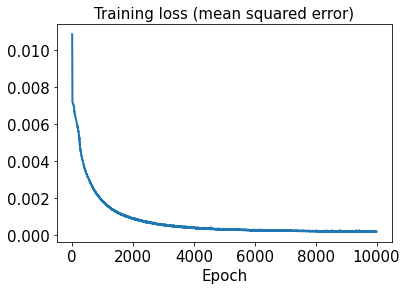

In [31]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

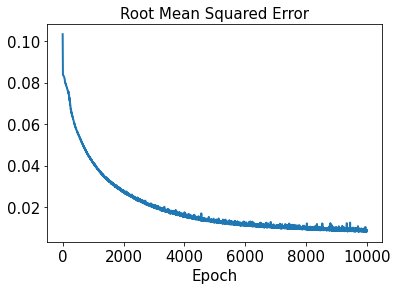

In [32]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
test_results = sd.evaluate(tsr_theta_train)

15/15 [==============================] - 0s 2ms/step - loss: 9.3381e-05 - rmse: 0.0000e+00


In [34]:
decoded_train = sd.predict(tsr_theta_train)

In [35]:
decoded_test = sd.predict(tsr_theta_test)

In [36]:
error_train_abs = np.abs(decoded_train - y_train)

In [37]:
error_test_abs = np.abs(decoded_test - y_test)

In [38]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0069850893


In [39]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.043112177


In [40]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.004779047, 0.006637417, 0.008283023, 0.0058732866, 0.008057348, 0.0063975216, 0.0062112813, 0.004662894, 0.0069808397, 0.008457946, 0.004835104, 0.0033357285, 0.0067305965, 0.0032355173, 0.0036141344, 0.0057224906, 0.0057362644, 0.003915521, 0.005614221, 0.006607702, 0.0066987732, 0.0061196354, 0.019610627, 0.0037823077, 0.009130645, 0.009935417, 0.006501089, 0.008791443, 0.0064437687, 0.00415513, 0.005407115, 0.013711566, 0.008421796, 0.0038955687, 0.008007157, 0.0068386695, 0.004953633, 0.004048393, 0.009631723, 0.007969404, 0.0054668877, 0.004956008, 0.0057997084, 0.007316117, 0.004997864, 0.008545692, 0.015399012, 0.0071264394, 0.0038558838, 0.008233739, 0.0048607076, 0.011044278, 0.0043788063, 0.0049845586, 0.007252461, 0.006263494, 0.013039799, 0.008341903, 0.009375707, 0.0061775227, 0.003470369, 0.00498148, 0.005295216, 0.003719569, 0.010881863, 0.0046858755, 0.007387883, 0.0062235044, 0.011582257, 0.00618913, 0.005904537, 0.016827807, 0.0060788593, 0.0056919167, 0.008045919,

In [41]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.015855374, 0.09204808, 0.018626563, 0.014256846, 0.023740083, 0.012734799, 0.06628663, 0.026238427, 0.015291286, 0.052000683, 0.019402284, 0.032814294, 0.16532072, 0.016190775, 0.012549855, 0.012600229, 0.011402137, 0.02312684, 0.016446816, 0.012861332, 0.04076837, 0.036137182, 0.030149762, 0.0078115365, 0.014764666, 0.01311143, 0.04026826, 0.015051283, 0.014214719, 0.02946295, 0.0067905933, 0.014277962, 0.01045672, 0.009865404, 0.046574976, 0.009914666, 0.013876512, 0.025586898, 0.006599169, 0.011474728, 0.038681563, 0.04986824, 0.008756663, 0.006305668, 0.06637963, 0.009251535, 0.009392994, 0.045153286, 0.023422906, 0.03181139, 0.011487978, 0.009981521, 0.04465742, 0.013833832, 0.17143519, 0.07404812, 0.012664028, 0.017163113, 0.018180002, 0.0110673085, 0.068382, 0.03541181, 0.016016908, 0.27971274, 0.014027317, 0.0651366, 0.021661406, 0.019697433, 0.011376376, 0.014544854, 0.0071185282, 0.015717037, 0.03362019, 0.041427486, 0.040831942, 0.017682822, 0.015335677, 0.0065375715, 0.0

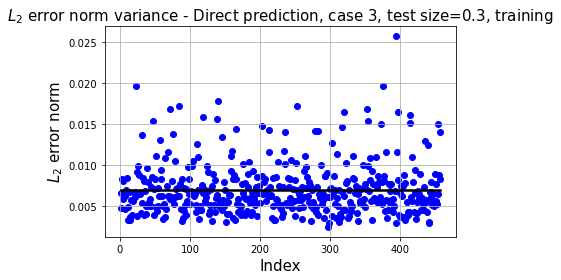

In [46]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 3, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

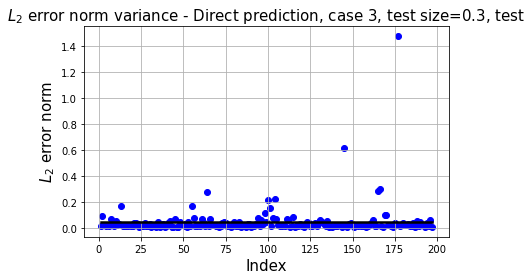

In [47]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 3, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

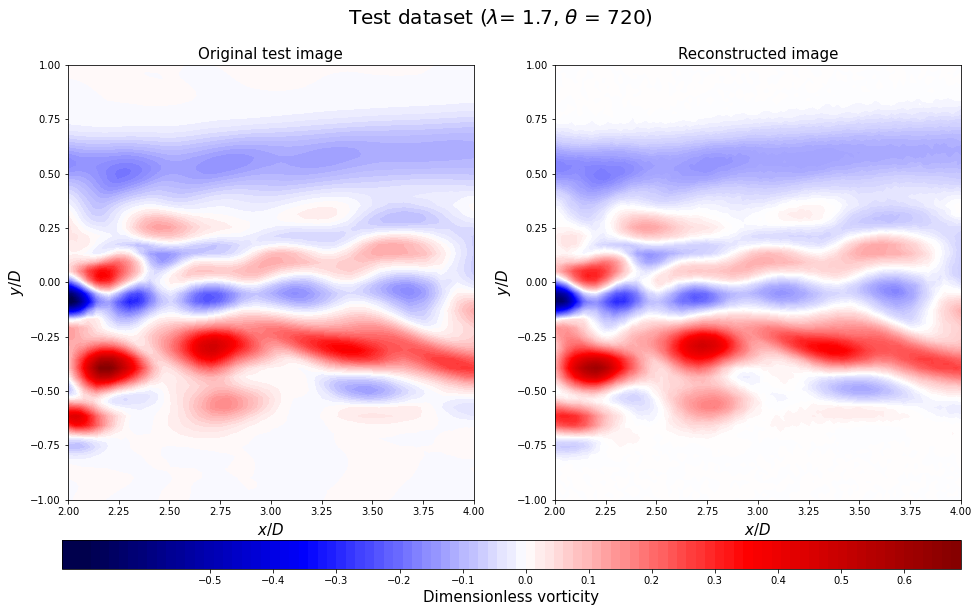

In [44]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

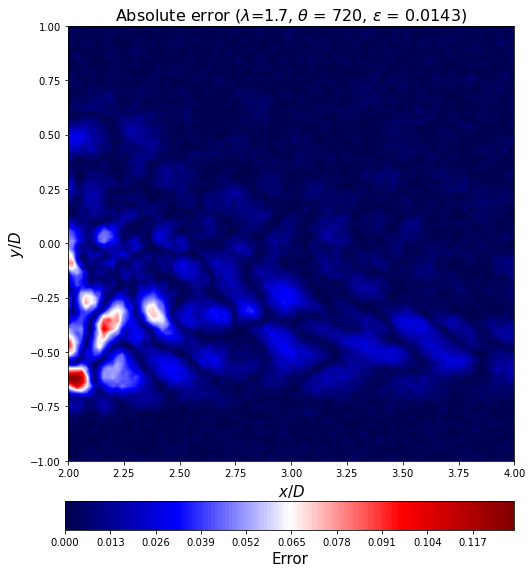

In [45]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()